# Forecasting using data from 2020 to 2024

## Forecasting using Facebook Prophet

In [47]:
!pip install prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [13]:
data= pd.read_csv("crime_dataset_india.csv")
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [14]:
# Displaying the shape of our dataset (Number of Rows and Columns)
data.shape

(40160, 14)

In [15]:
# Information of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [16]:
# Checking the null values in the dataset
data.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [17]:
# Selecting only the necessary columns
data.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [18]:
df= data[['Report Number','Time of Occurrence','Crime Description','City']]
df.head()

,Report Number,Time of Occurrence,Crime Description,City
0,1,01-01-2020 01:11,IDENTITY THEFT,Ahmedabad
1,2,01-01-2020 06:26,HOMICIDE,Chennai
2,3,01-01-2020 14:30,KIDNAPPING,Ludhiana
3,4,01-01-2020 14:46,BURGLARY,Pune
4,5,01-01-2020 16:51,VANDALISM,Pune


In [19]:
# Again checking for null values in the new dataframe
df.isnull().sum()

Report Number         0
Time of Occurrence    0
Crime Description     0
City                  0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Time of Occurrence  40160 non-null  object
 2   Crime Description   40160 non-null  object
 3   City                40160 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [21]:
# Renaming the Time of occurence column as Date in the dataframe
df = df.rename(columns={"Time of Occurrence": "Date"})
df.head()

,Report Number,Date,Crime Description,City
0,1,01-01-2020 01:11,IDENTITY THEFT,Ahmedabad
1,2,01-01-2020 06:26,HOMICIDE,Chennai
2,3,01-01-2020 14:30,KIDNAPPING,Ludhiana
3,4,01-01-2020 14:46,BURGLARY,Pune
4,5,01-01-2020 16:51,VANDALISM,Pune


In [22]:
# Converting the Datatype of the column Date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M', errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Report Number      40160 non-null  int64         
 1   Date               40160 non-null  datetime64[ns]
 2   Crime Description  40160 non-null  object        
 3   City               40160 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


## Analysis of the Data before forecasting

### 1) Find the Top 10 Crime Types

In [71]:
df['Crime Description'].value_counts().head(10)

Crime Description
BURGLARY             1980
VANDALISM            1975
FRAUD                1965
DOMESTIC VIOLENCE    1932
FIREARM OFFENSE      1931
ROBBERY              1928
KIDNAPPING           1920
IDENTITY THEFT       1918
SEXUAL ASSAULT       1917
ASSAULT              1915
Name: count, dtype: int64

### 2) Find the Top 10 Crime Location Cities

In [72]:
df['City'].value_counts().head(10)

City
Delhi        5400
Mumbai       4415
Bangalore    3588
Hyderabad    2881
Kolkata      2518
Chennai      2493
Pune         2212
Ahmedabad    1817
Jaipur       1479
Lucknow      1456
Name: count, dtype: int64

## Visualization of Data

In [24]:
## Making the Date column as the index of the Dataframe
df.set_index('Date', inplace=True)

In [77]:
print(df.index[:5]) 

DatetimeIndex(['2020-01-01 01:11:00', '2020-01-01 06:26:00',
               '2020-01-01 14:30:00', '2020-01-01 14:46:00',
               '2020-01-01 16:51:00'],
              dtype='datetime64[ns]', name='Date', freq=None)


C:\Users\Arya\AppData\Local\Temp\ipykernel_21996\3826457848.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').size()


<Axes: xlabel='Date'>

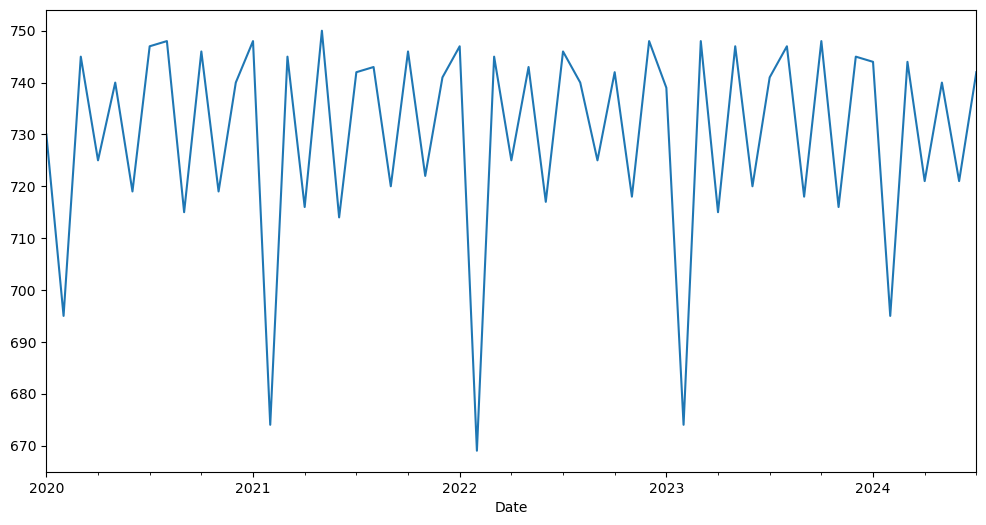

In [93]:
# Crimes per month across all years
monthly_counts = df.resample('M').size()
monthly_counts.plot(figsize=(12,6))

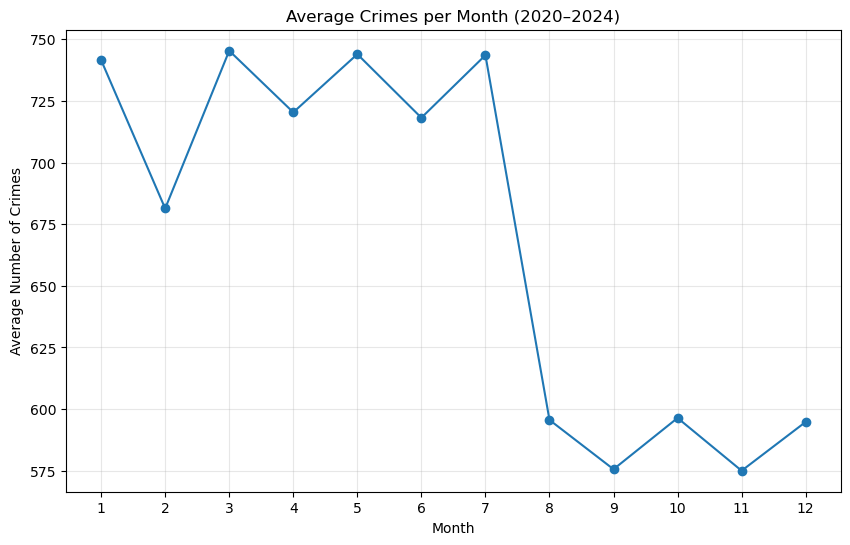

In [25]:
# Average Crimes by month(seasonality)
# Extracting Year and Month
df['Year'] = df.index.year
df['Month'] = df.index.month

# Group by month across all years and taking the mean
monthly_avg = df.groupby('Month').size() / df['Year'].nunique()

plt.figure(figsize=(10,6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Average Number of Crimes")
plt.title("Average Crimes per Month (2020–2024)")
plt.grid(True, alpha=0.3)
plt.show()

<Axes: xlabel='Hour'>

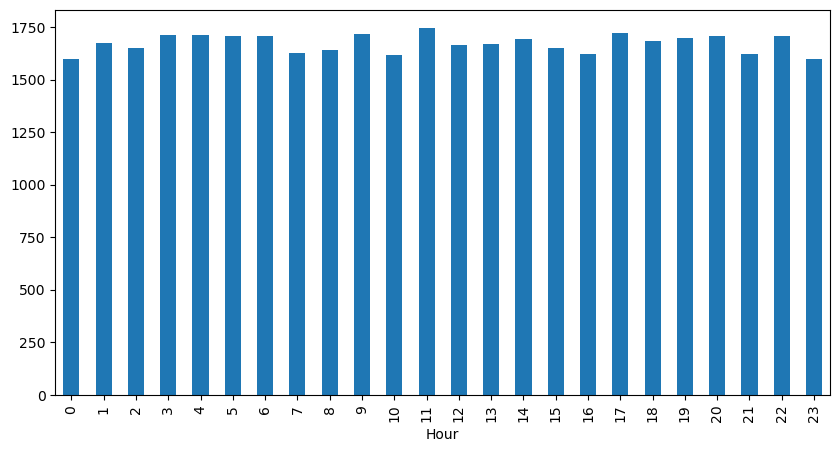

In [26]:
#Crimes by hour of day
df['Hour'] = df.index.hour
hourly_counts = df.groupby('Hour').size()
hourly_counts.plot(kind='bar', figsize=(10,5))

In [27]:
print(sorted(df.index.year.unique()))

[2020, 2021, 2022, 2023, 2024]


In [28]:
df.head()

,Report Number,Crime Description,City,Year,Month,Hour
Date,,,,,,
2020-01-01 01:11:00,1,IDENTITY THEFT,Ahmedabad,2020,1,1
2020-01-01 06:26:00,2,HOMICIDE,Chennai,2020,1,6
2020-01-01 14:30:00,3,KIDNAPPING,Ludhiana,2020,1,14
2020-01-01 14:46:00,4,BURGLARY,Pune,2020,1,14
2020-01-01 16:51:00,5,VANDALISM,Pune,2020,1,16


In [29]:
df['Year'] = df.index.year
df['Month'] = df.index.month
print(df.groupby(['Year','Month']).size())

Year  Month
2020  1        730
      2        695
      3        745
      4        725
      5        740
      6        719
      7        747
      8        748
      9        715
      10       746
      11       719
      12       740
2021  1        748
      2        674
      3        745
      4        716
      5        750
      6        714
      7        742
      8        743
      9        720
      10       746
      11       722
      12       741
2022  1        747
      2        669
      3        745
      4        725
      5        743
      6        717
      7        746
      8        740
      9        725
      10       742
      11       718
      12       748
2023  1        739
      2        674
      3        748
      4        715
      5        747
      6        720
      7        741
      8        747
      9        718
      10       748
      11       716
      12       745
2024  1        744
      2        695
      3        744
      4        721


In [30]:
# Aggregating the number of cases per month for all years
df_prophet= pd.DataFrame(df.resample('M').size().reset_index())
df_prophet

C:\Users\Arya\AppData\Local\Temp\ipykernel_16588\2405044590.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_prophet= pd.DataFrame(df.resample('M').size().reset_index())


,Date,0
0,2020-01-31,730
1,2020-02-29,695
2,2020-03-31,745
3,2020-04-30,725
4,2020-05-31,740
5,2020-06-30,719
6,2020-07-31,747
7,2020-08-31,748
8,2020-09-30,715
9,2020-10-31,746


In [104]:
df_prophet.columns= ['Date','Crime Count']
df_prophet

,Date,Crime Count
0,2020-01-31,730
1,2020-02-29,695
2,2020-03-31,745
3,2020-04-30,725
4,2020-05-31,740
5,2020-06-30,719
6,2020-07-31,747
7,2020-08-31,748
8,2020-09-30,715
9,2020-10-31,746


In [105]:
# Renaming the columns as facebook prophet only takes two columns as input ds and y
df_prophet= df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})
df_prophet

,ds,y
0,2020-01-31,730
1,2020-02-29,695
2,2020-03-31,745
3,2020-04-30,725
4,2020-05-31,740
5,2020-06-30,719
6,2020-07-31,747
7,2020-08-31,748
8,2020-09-30,715
9,2020-10-31,746


### Training the model

In [106]:
model = Prophet()
model.fit(df_prophet)

22:30:15 - cmdstanpy - INFO - Chain [1] start processing
22:30:16 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting using the trained model

In [108]:
pred= model.make_future_dataframe(periods=24, freq='ME')
forecast= model.predict(pred)

In [109]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-31,732.393750,735.405797,745.276814,732.393750,732.393750,7.833423,7.833423,7.833423,7.833423,7.833423,7.833423,0.0,0.0,0.0,740.227173
1,2020-02-29,732.329766,683.057180,692.888658,732.329766,732.329766,-44.443693,-44.443693,-44.443693,-44.443693,-44.443693,-44.443693,0.0,0.0,0.0,687.886073
2,2020-03-31,732.261370,737.055140,746.685689,732.261370,732.261370,9.644530,9.644530,9.644530,9.644530,9.644530,9.644530,0.0,0.0,0.0,741.905900
3,2020-04-30,732.195180,716.273734,725.918593,732.195180,732.195180,-11.150541,-11.150541,-11.150541,-11.150541,-11.150541,-11.150541,0.0,0.0,0.0,721.044639
4,2020-05-31,732.126783,736.548573,746.318793,732.126783,732.126783,9.312680,9.312680,9.312680,9.312680,9.312680,9.312680,0.0,0.0,0.0,741.439463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2026-03-31,734.211397,745.749202,755.461941,733.852782,734.558740,16.367813,16.367813,16.367813,16.367813,16.367813,16.367813,0.0,0.0,0.0,750.579210
75,2026-04-30,734.290410,717.843536,727.684776,733.905909,734.666441,-11.437789,-11.437789,-11.437789,-11.437789,-11.437789,-11.437789,0.0,0.0,0.0,722.852620
76,2026-05-31,734.372056,743.697434,753.421631,733.957356,734.773502,14.266471,14.266471,14.266471,14.266471,14.266471,14.266471,0.0,0.0,0.0,748.638527
77,2026-06-30,734.451068,715.543993,725.439961,734.013584,734.887262,-13.827351,-13.827351,-13.827351,-13.827351,-13.827351,-13.827351,0.0,0.0,0.0,720.623717


### Visualizing the forecasted Data

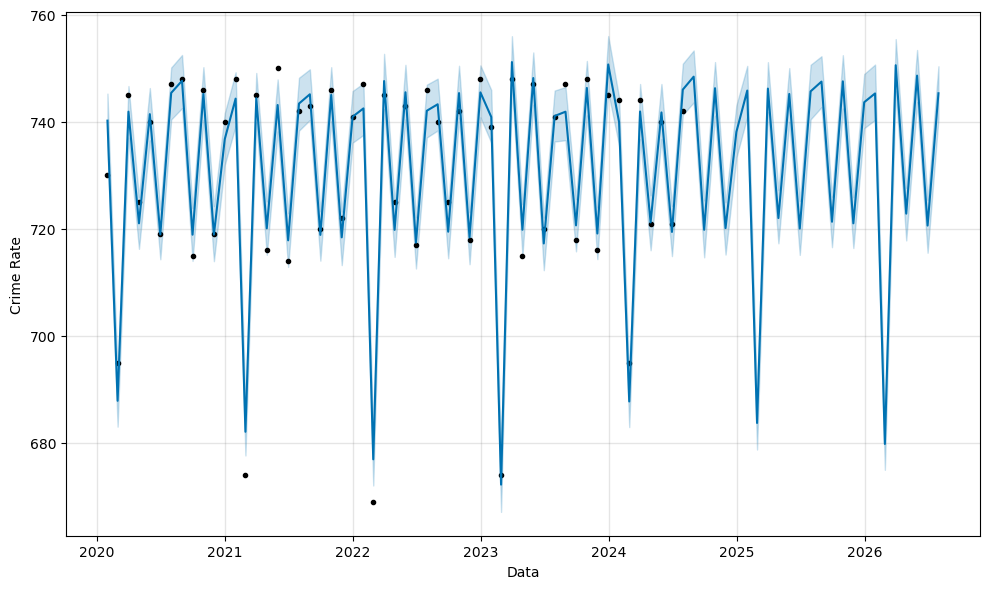

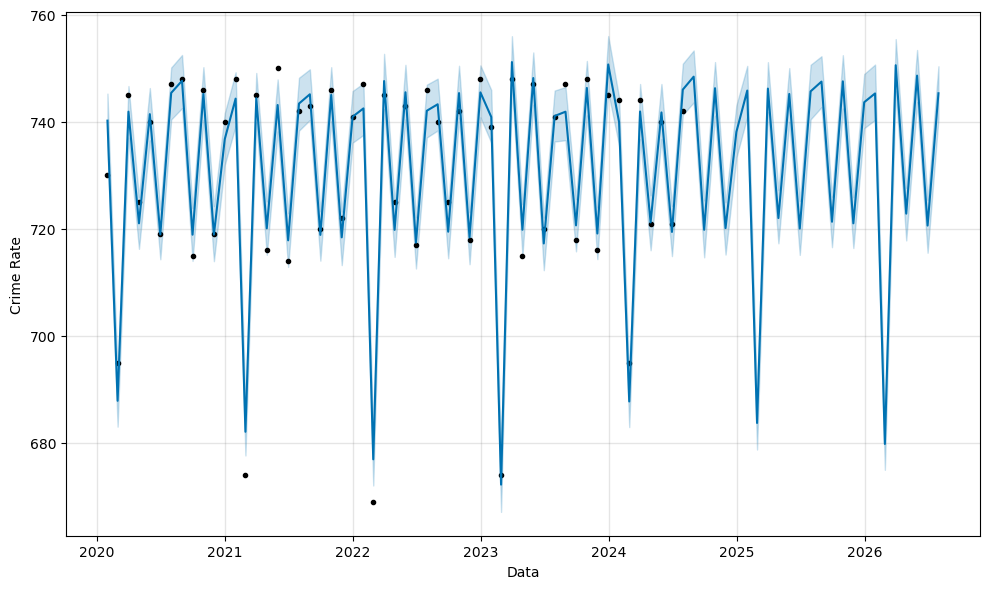

In [110]:
model.plot(forecast, xlabel="Data",ylabel= "Crime Rate")

## Saving the Model

In [3]:
import json
from prophet.serialize import model_to_json, model_from_json

In [114]:
# Saving the model
with open('prophet_model.json','w') as fout:
    json.dump(model_to_json(model), fout) 

In [4]:
# Loading the Model
with open('prophet_model.json','r') as fin:
    m1= model_from_json(json.load(fin)) 

In [5]:
x= int(input("Enter number of months to forecast"))

Enter number of months to forecast 36


In [6]:
pred= m1.make_future_dataframe(periods=x, freq="M")
forecast= m1.predict(pred)
forecast

C:\Users\Arya\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-31,732.393750,735.071682,745.406483,732.393750,732.393750,7.833423,7.833423,7.833423,7.833423,7.833423,7.833423,0.0,0.0,0.0,740.227173
1,2020-02-29,732.329766,682.665733,693.048211,732.329766,732.329766,-44.443693,-44.443693,-44.443693,-44.443693,-44.443693,-44.443693,0.0,0.0,0.0,687.886073
2,2020-03-31,732.261370,736.950126,746.967268,732.261370,732.261370,9.644530,9.644530,9.644530,9.644530,9.644530,9.644530,0.0,0.0,0.0,741.905900
3,2020-04-30,732.195180,716.221459,725.774555,732.195180,732.195180,-11.150541,-11.150541,-11.150541,-11.150541,-11.150541,-11.150541,0.0,0.0,0.0,721.044639
4,2020-05-31,732.126783,736.556157,746.444074,732.126783,732.126783,9.312680,9.312680,9.312680,9.312680,9.312680,9.312680,0.0,0.0,0.0,741.439463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2027-03-31,735.172716,750.116787,760.123474,734.366070,735.940023,19.845034,19.845034,19.845034,19.845034,19.845034,19.845034,0.0,0.0,0.0,755.017750
87,2027-04-30,735.251729,718.703973,728.394735,734.408453,736.056380,-11.558442,-11.558442,-11.558442,-11.558442,-11.558442,-11.558442,0.0,0.0,0.0,723.693286
88,2027-05-31,735.333375,747.242196,756.544966,734.453823,736.180632,16.700644,16.700644,16.700644,16.700644,16.700644,16.700644,0.0,0.0,0.0,752.034019
89,2027-06-30,735.412387,716.214344,726.262711,734.500593,736.299341,-14.283564,-14.283564,-14.283564,-14.283564,-14.283564,-14.283564,0.0,0.0,0.0,721.128823


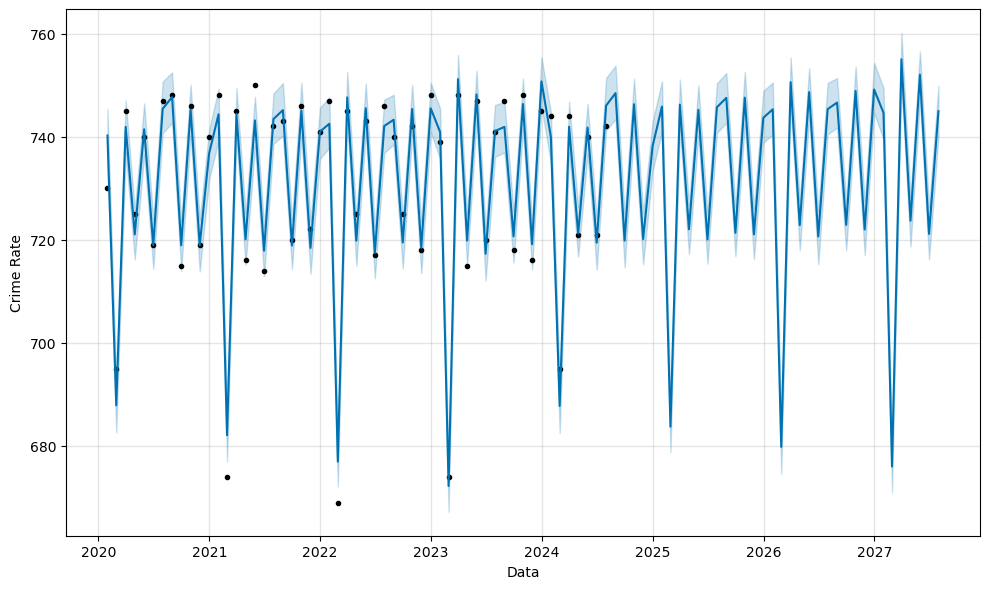

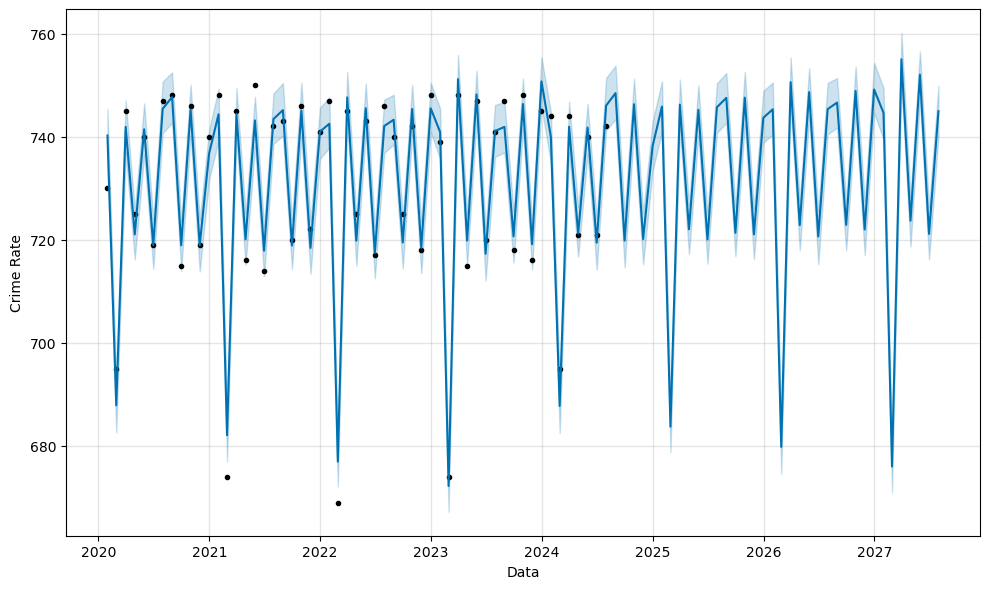

In [7]:
# Visualzing this forecast
m1.plot(forecast, xlabel="Data",ylabel= "Crime Rate")

In [8]:
from prophet.diagnostics import cross_validation, performance_metrics

# Cross validation: initial training period, horizon = forecast length, period = step size
df_cv = cross_validation(m1, initial='1095 days', period='180 days', horizon='365 days')

# Computing the metrics (MAE, RMSE, MAPE, etc.)
df_perf = performance_metrics(df_cv)

print(df_perf.head())

mae = df_perf['mae'].mean()
rmse = df_perf['rmse'].mean()
mse = df_perf['mse'].mean()
mape_pct = df_perf['mape'].mean() * 100
print(mape_pct)

print(mae, rmse, mse)

  0%|          | 0/2 [00:00<?, ?it/s]

00:03:36 - cmdstanpy - INFO - Chain [1] start processing
00:03:37 - cmdstanpy - INFO - Chain [1] done processing
00:03:37 - cmdstanpy - INFO - Chain [1] start processing
00:03:37 - cmdstanpy - INFO - Chain [1] done processing


  horizon         mse       rmse        mae      mape     mdape     smape  \
0 30 days  157.816743  12.562513  12.111852  0.016850  0.016850  0.017001   
1 57 days  134.578132  11.600782  10.487405  0.014034  0.014034  0.014129   
2 60 days   55.432932   7.445330   7.244773  0.009936  0.009936  0.009884   
3 87 days  108.397151  10.411395  10.322075  0.014410  0.014410  0.014305   
4 91 days   98.673843   9.933471   9.742005  0.013385  0.013385  0.013346   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
1.1255212410257331
8.22517056889091 8.945339211477645 88.87017898011712


#### Plot to compare the actual values with the Prophet's forecasted values from cross validation

#### This gives us Prophet's RMSE over different forecast horizons, to see if accuracy decays over time
#### A direct overlay of actual vs. forecasted values, so we can visually check how well Prophet tracks the crime data.

C:\Users\Arya\anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\Arya\anaconda3\Lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


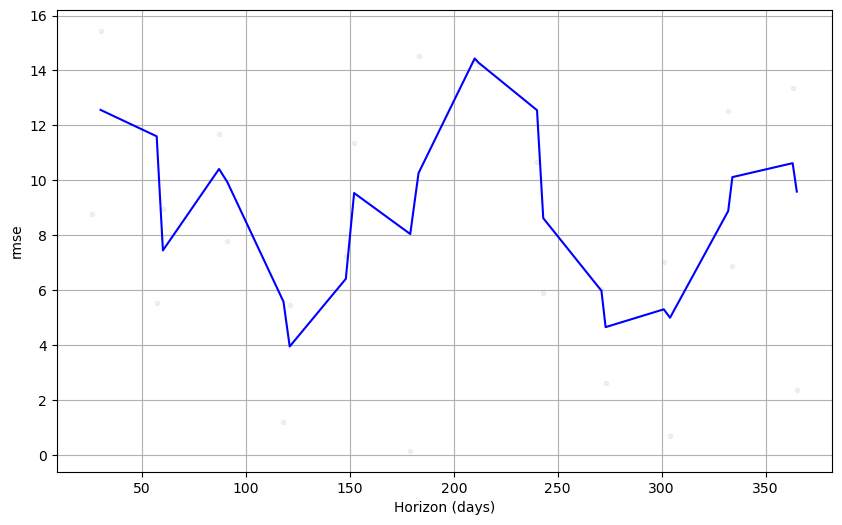

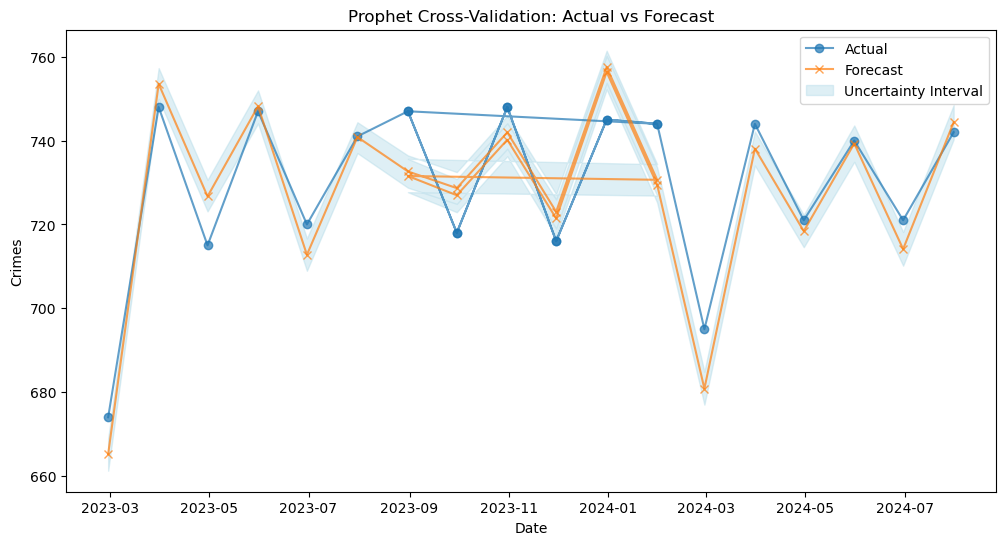

In [113]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

# Plot RMSE across horizons
plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(df_cv['ds'], df_cv['y'], label='Actual', marker='o', alpha=0.7)
plt.plot(df_cv['ds'], df_cv['yhat'], label='Forecast', marker='x', alpha=0.7)

# Add uncertainty intervals
plt.fill_between(df_cv['ds'], df_cv['yhat_lower'], df_cv['yhat_upper'], 
                 color='lightblue', alpha=0.4, label='Uncertainty Interval')

plt.legend()
plt.title("Prophet Cross-Validation: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Crimes")
plt.show()

## Forecasting using ARIMA model

In [31]:
import pmdarima as pm

In [32]:
from statsforecast.models import AutoARIMA

In [34]:
data= pd.read_csv("crime_dataset_india.csv")
data.head(5)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [35]:
df= data[['Report Number','Time of Occurrence','Crime Description','City']]
df.head()

,Report Number,Time of Occurrence,Crime Description,City
0,1,01-01-2020 01:11,IDENTITY THEFT,Ahmedabad
1,2,01-01-2020 06:26,HOMICIDE,Chennai
2,3,01-01-2020 14:30,KIDNAPPING,Ludhiana
3,4,01-01-2020 14:46,BURGLARY,Pune
4,5,01-01-2020 16:51,VANDALISM,Pune


In [36]:
df = df.rename(columns={"Time of Occurrence": "Date"})
df.head()

,Report Number,Date,Crime Description,City
0,1,01-01-2020 01:11,IDENTITY THEFT,Ahmedabad
1,2,01-01-2020 06:26,HOMICIDE,Chennai
2,3,01-01-2020 14:30,KIDNAPPING,Ludhiana
3,4,01-01-2020 14:46,BURGLARY,Pune
4,5,01-01-2020 16:51,VANDALISM,Pune


In [37]:
# Converting the Datatype of the column Date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Report Number      40160 non-null  int64         
 1   Date               40160 non-null  datetime64[ns]
 2   Crime Description  40160 non-null  object        
 3   City               40160 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [38]:
# Setting the Date as index
df.set_index('Date', inplace=True)

In [39]:
# Aggregating into monthly counts
y = df.resample('M').size()

print(y.head(15))  # first 15 months

Date
2020-01-31    730
2020-02-29    695
2020-03-31    745
2020-04-30    725
2020-05-31    740
2020-06-30    719
2020-07-31    747
2020-08-31    748
2020-09-30    715
2020-10-31    746
2020-11-30    719
2020-12-31    740
2021-01-31    748
2021-02-28    674
2021-03-31    745
Freq: ME, dtype: int64


C:\Users\Arya\AppData\Local\Temp\ipykernel_16588\724072974.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = df.resample('M').size()


### Fitting the AutoSARIMA model for seasonality= 12 months

In [40]:
model = pm.auto_arima(
    y,
    seasonal=True,
    m=12,            # yearly seasonality (12 months)
    trace=True,      # print model selection process
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=488.268, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=468.496, Time=0.44 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=883.386, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=473.412, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=466.459, Time=1.48 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=485.874, Time=0.87 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=459.090, Time=1.48 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=459.618, Time=0.83 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=592.325, Time=2.11 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=458.115, T

### Forecasting for the next 24 months

In [21]:
n_periods = 24
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\Arya\AppData\Local\Temp\ipykernel_16060\2697198585.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(y.index[-1] + pd.offsets.MonthEnd(), periods=n_periods, freq='M')


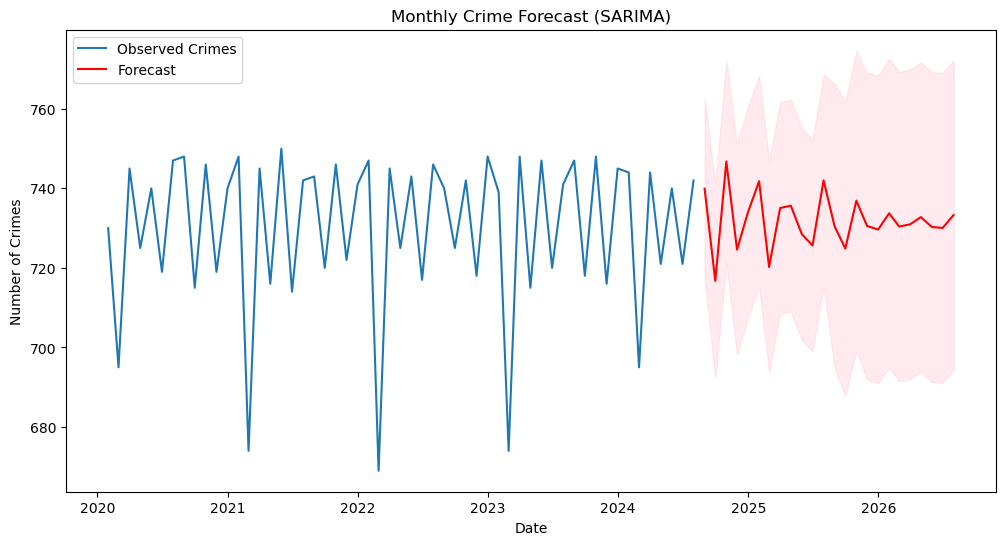

In [22]:
# Plotting the results

forecast_index = pd.date_range(y.index[-1] + pd.offsets.MonthEnd(), periods=n_periods, freq='M')

plt.figure(figsize=(12,6))
plt.plot(y.index, y, label="Observed Crimes")
plt.plot(forecast_index, forecast, label="Forecast", color="red")
plt.fill_between(forecast_index, conf_int[:,0], conf_int[:,1], color='pink', alpha=0.3)
plt.title("Monthly Crime Forecast (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend()
plt.show()

In [44]:
# Evaluation of SARIMA using cross validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import pmdarima as pm

#choosing the number of folds
tscv = TimeSeriesSplit(n_splits=5)
errors = []

fold = 1
for train_idx, test_idx in tscv.split(y):
    train, test = y.iloc[train_idx], y.iloc[test_idx]

    if len(train) < 2*12:   # if < 2 seasonal cycles, then we skip
        print(f"Skipping fold (train size={len(train)}) - not enough data for seasonal differencing")
        continue
    
    # Fitting SARIMA on train fold
    model = pm.auto_arima(
        train,
        seasonal=True,
        m=12,
        D=0, #this helps in preventing seasonal difference
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )
    
    # Forecast length = len(test)
    forecast = model.predict(n_periods=len(test))
    
    # Metrics
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, forecast)
    mape = np.mean(np.abs((test - forecast) / test)) * 100
    
    errors.append([mse, rmse, mae, mape])
    
    print(f"Fold {fold}: MSE={mse:.2f}, RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}%")
    fold += 1


#Average Metrics

errors = np.array(errors)
avg_mse, avg_rmse, avg_mae, avg_mape = errors.mean(axis=0)

print("\nAverage Cross-Validation Metrics (SARIMA):")
print(f"MSE: {avg_mse:.2f}")
print(f"RMSE: {avg_rmse:.2f}")
print(f"MAE: {avg_mae:.2f}")
print(f"MAPE: {avg_mape:.2f}%")

Skipping fold (train size=10) - not enough data for seasonal differencing
Skipping fold (train size=19) - not enough data for seasonal differencing
Fold 1: MSE=73.74, RMSE=8.59, MAE=6.41, MAPE=0.87%
Fold 2: MSE=139.82, RMSE=11.82, MAE=10.75, MAPE=1.49%
Fold 3: MSE=30.13, RMSE=5.49, MAE=4.36, MAPE=0.59%

Average Cross-Validation Metrics (SARIMA):
MSE: 81.23
RMSE: 8.63
MAE: 7.17
MAPE: 0.98%


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=220.947, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=211.657, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=209.401, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=218.962, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=210.228, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=211.179, Time=0.59 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=210.574, Time=0.11 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=213.179, Time=0.66 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=220.673, Time=0.11 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=210.818, Time=0.28 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=210.778, Time=0.23 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=210.296, Time=0.14 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AI

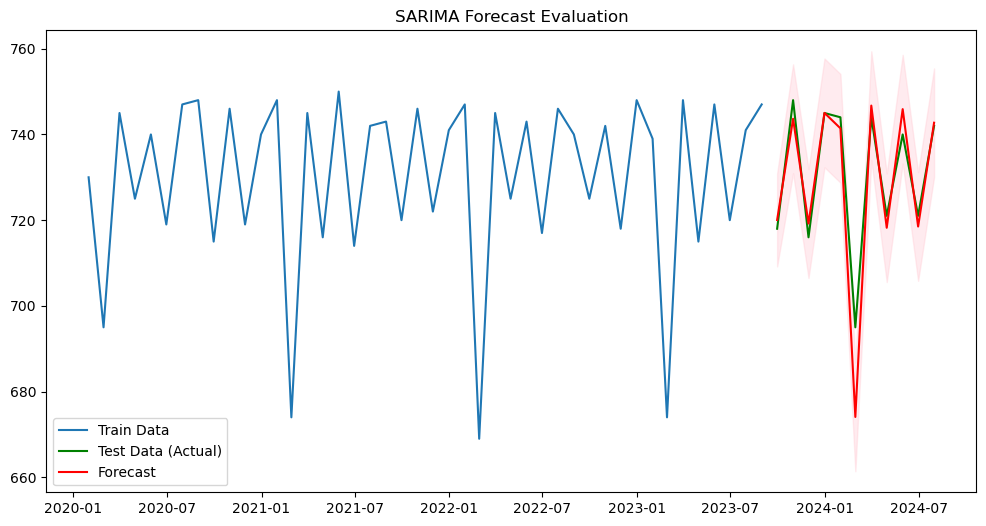

In [42]:
#Evaluating the forecast by SARIMA using train-test split approach

# We split the data into train (80%) and test (20%) sets and then fit a Seasonal ARIMA (SARIMA) model on the training data using auto_arima which automatically selects the best parameters.
# Evaluating the model using metrics such as MSE, RMSE, MAE, and MAPE.
# Plotting the train data, actual test data, forecastedvalues, and confidence intervals for visual comparison.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train/Test Split

train_size = int(len(y) * 0.8) 
train, test = y[:train_size], y[train_size:]


# Fitting the SARIMA on train

model = pm.auto_arima(
    train,
    seasonal=True,
    m=12, 
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Forecasting same length as test

forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)


# Evaluation

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

# MAPE calculation
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


# Plotting the Train vs Test Forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Test Data (Actual)", color="green")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.fill_between(test.index, conf_int[:,0], conf_int[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast Evaluation")
plt.show()